1.3.1 Задание: Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

Точки  [1 1 1]  и  [3 4 5] :
Расстояние Евклида:  5.385164807134504
Квадрат расстояние Евклида:  28.999999999999996
Расстояние Чебышева:  4.0
Расстояние Хемминга:  9.0
Точки  [1 1 1]  и  [4 7 8] :
Расстояние Евклида:  9.695359714832659
Квадрат расстояние Евклида:  94.00000000000001
Расстояние Чебышева:  7.0
Расстояние Хемминга:  16.0
Точки  [1 1 1]  и  [3 3 3] :
Расстояние Евклида:  3.4641016151377544
Квадрат расстояние Евклида:  11.999999999999998
Расстояние Чебышева:  2.0
Расстояние Хемминга:  6.0
Точки  [3 4 5]  и  [4 7 8] :
Расстояние Евклида:  4.358898943540674
Квадрат расстояние Евклида:  19.000000000000004
Расстояние Чебышева:  3.0
Расстояние Хемминга:  7.0
Точки  [3 4 5]  и  [3 3 3] :
Расстояние Евклида:  2.23606797749979
Квадрат расстояние Евклида:  5.000000000000001
Расстояние Чебышева:  2.0
Расстояние Хемминга:  3.0
Точки  [4 7 8]  и  [3 3 3] :
Расстояние Евклида:  6.48074069840786
Квадрат расстояние Евклида:  42.0
Расстояние Чебышева:  5.0
Расстояние Хемминга:  10.0


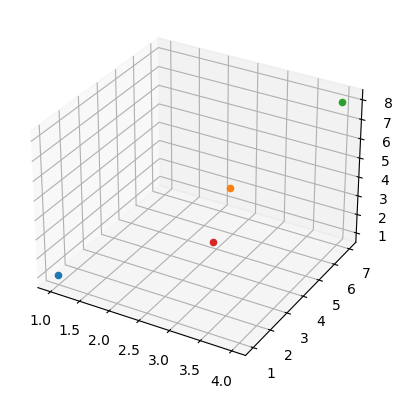

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

a = [1, 1, 1]
b = [3, 4, 5]
c = [4, 7, 8]
d = [3, 3, 3]
x = np.array([a, b, c, d])
for i in range(4):
  for j in range(i + 1, 4):
    print("Точки ", x[i], " и ", x[j], ":")
    print("Расстояние Евклида: ", np.linalg.norm(x[i] - x[j]))
    print("Квадрат расстояние Евклида: ", np.linalg.norm(x[i] - x[j])**2)
    print("Расстояние Чебышева: ", np.linalg.norm(x[i] - x[j], ord=np.inf))
    print("Расстояние Хемминга: ", np.linalg.norm(x[i] - x[j], ord=1))

ax.scatter(a[0], a[1], a[2])
ax.scatter(b[0], b[1], b[2])
ax.scatter(c[0], c[1], c[2])
ax.scatter(d[0], d[1], d[2])

1.3.2 Задание: Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange

In [ ]:
import numpy as np

a = np.array([np.arange(5)] * 5)

print(a)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


2.3.1 Задание: Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

(127, 4) (23, 4) (127,) (23,)
['virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'setosa']
accuracy: 0.957


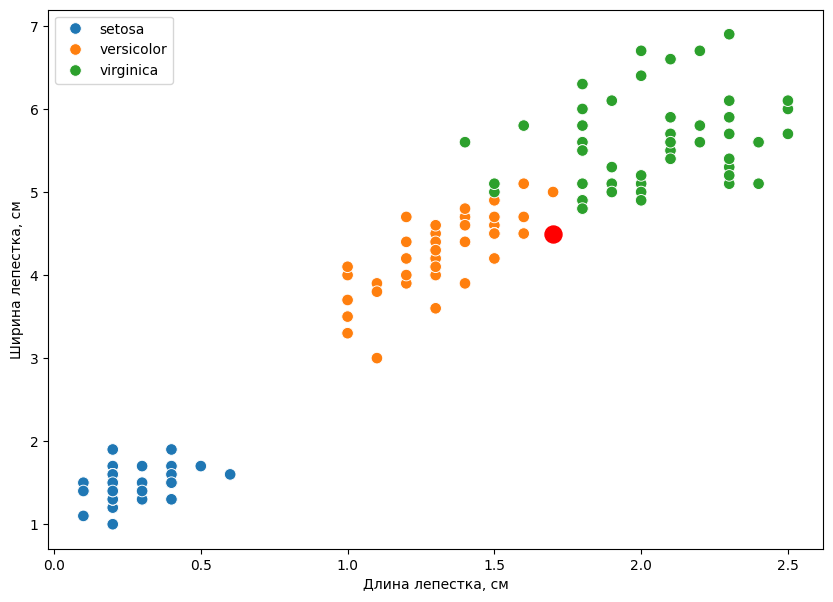

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size = 0.15)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

plt.figure(figsize=(10, 7))

sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()
plt.grid

for i in range(len(y_test)):
  if np.array(y_test)[i] != y_pred[i]:
    plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

3.3.2 Задание: Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"цвет глаз": 7, "цвет кожи": 8},
             {"цвет кожи": 1, "длина волос": 3},
             {"рост": 5, "вес": 2}]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)

print(features)

[[0. 0. 0. 7. 8.]
 [0. 3. 0. 0. 1.]
 [2. 0. 5. 0. 0.]]
